<a href="https://colab.research.google.com/github/A01703130/Evaluacion/blob/main/DFMEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [2]:
#Convertir en dataframe
mex=pd.read_csv("DF_Mexico (1).csv")
mex
     

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,NaN,https://a0.muscache.com/pictures/db71951a-8696...,154670560,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,...,NaN,NaN,NaN,NaN,t,13,13,0,0,NaN


# Procesamiento de datos

Justificación: Se determinó que los valores nulos del dataframe se sustituirían por el promedio de los valores de cada columa. Esto solo se realizó en las variables numéricas. Por lo que en las columnas de características los valores nulos se mantienen como Nan.
Se determinó de esta forma debido a que si se ingresa un valor en concreto se modificaría el sentido de los datos o se podrían generar valores extremos.

In [3]:
#Verificamos información del DataFrame
mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [4]:
#Identificar valores nulos por columna
valores_nulos=mex.isnull().sum()
valores_nulos.head(20)

id                           0
listing_url                  0
scrape_id                    0
last_scraped                 0
source                       0
name                         1
description                928
neighborhood_overview     9079
picture_url                  0
host_id                      0
host_url                     0
host_name                    0
host_since                   0
host_location             5172
host_about               10664
host_response_time        3091
host_response_rate        3091
host_acceptance_rate      2043
host_is_superhost            5
host_thumbnail_url           0
dtype: int64

In [5]:
#Identificar valores nulos por dataframe
valores_nulos=mex.isnull().sum().sum()
valores_nulos

189609

In [6]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
mex2=mex.copy()
mex2=mex2.fillna(round(mex.mean(),1))
mex2

<ipython-input-6-97763e3d1b0a>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mex2=mex2.fillna(round(mex.mean(),1))


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.80,4.80,4.70,NaN,f,1,1,0,0,1.70
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,...,4.80,4.80,4.70,NaN,f,2,2,0,0,1.70
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,...,4.80,4.80,4.70,NaN,t,1,1,0,0,1.70
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,NaN,https://a0.muscache.com/pictures/db71951a-8696...,154670560,...,4.80,4.80,4.70,NaN,f,1,0,1,0,1.70
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,...,4.80,4.80,4.70,NaN,t,13,13,0,0,1.70


In [7]:
#Corroboramos valores nulos del dataframe
valores_nulos=mex2.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [8]:
from google.colab import files
valores_nulos.to_csv("nulosmex.csv")

In [9]:
mex2['name'] = mex2['name'].fillna('Sin registro')

In [10]:
mex2['description'] = mex2['description'].fillna('Sin registro')

In [11]:
mex2['neighborhood_overview'] = mex2['neighborhood_overview'].fillna('Sin registro')

In [12]:
mex2['host_location'] = mex2['host_location'].fillna('Sin registro')

In [13]:
mex2['host_about'] = mex2['host_about'].fillna('Sin registro')

In [14]:
mex2['host_response_time'] = mex2['host_response_time'].fillna('Sin registro')

In [15]:
mex2['host_response_rate'] = mex2['host_response_rate'].fillna('-')

In [16]:
mex2['host_acceptance_rate'] = mex2['host_acceptance_rate'].fillna('Sin registro')

In [17]:
mex2['host_is_superhost'] = mex2['host_is_superhost'].fillna('Sin registro')

In [18]:
mex2['host_neighbourhood'] = mex2['host_neighbourhood'].fillna('Sin registro')

In [19]:
mex2['neighbourhood'] = mex2['neighbourhood'].fillna('Sin registro')

In [20]:
mex2['neighbourhood_group_cleansed'] = mex2['neighbourhood_group_cleansed'].fillna('Sin registro')

In [21]:
mex2['bathrooms'] = mex2['bathrooms'].fillna('--')

In [22]:
mex2['bathrooms_text'] = mex2['bathrooms_text'].fillna('Sin registro')

In [23]:
mex2['calendar_updated'] = mex2['calendar_updated'].fillna('Sin registro')

In [24]:
mex2['first_review'] = mex2['first_review'].fillna('Sin registro')

In [25]:
mex2['last_review'] = mex2['last_review'].fillna('Sin registro')

In [26]:
mex2['license'] = mex2['license'].fillna('Sin registro')

# **Eliminación de Outliers**

Justificación: Se definió utilizar el método de desviación estándar para la eliminación de los outliers en el dataframe. Esto es con la finalidad de que se determinara que los valores más allá de la desviación estándar se eliminaran. Esto lo decidí ya que las desviaciones de las variables en su mayoría no son muy significativas

<Figure size 1500x800 with 0 Axes>

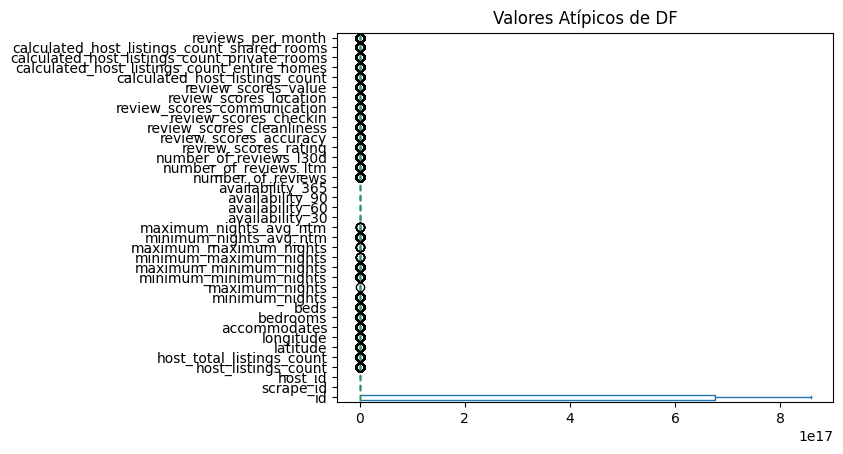

In [27]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
mex2.plot(kind='box', vert=False)
plt.title("Valores Atípicos de DF")
plt.show() #dibujamos el diagrama

In [28]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=mex2
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

<ipython-input-28-5ee84693c7d0>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-28-5ee84693c7d0>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()


Limite superior permitido id                                              1.329210e+18
scrape_id                                       2.023033e+13
host_id                                         6.520127e+08
host_listings_count                             2.528303e+02
host_total_listings_count                       4.262030e+02
latitude                                        1.953257e+01
longitude                                      -9.906563e+01
accommodates                                    9.933140e+00
bedrooms                                        4.972702e+00
beds                                            6.934289e+00
minimum_nights                                  8.491454e+01
maximum_nights                                  2.018372e+03
minimum_minimum_nights                          7.457055e+01
maximum_minimum_nights                          7.564005e+01
minimum_maximum_nights                          2.164892e+03
maximum_maximum_nights                          2.164344e+0

<ipython-input-28-5ee84693c7d0>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior= y.mean() - 3*y.std()
<ipython-input-28-5ee84693c7d0>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior= y.mean() - 3*y.std()


In [29]:
#Encontramos Ouliers del Dataframe
outliers= mex2[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-29-7e451e32da40>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= mex2[(y>Limite_Superior)|(y<Limite_Inferior)]


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Eliminamos columnas innecesarias
mex3= mex2.drop(['id'], axis=1)
mex3

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,Sin registro,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,4.95,5.00,4.86,Sin registro,f,3,3,0,0,0.19
1,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,...,5.00,4.95,4.84,Sin registro,f,2,2,0,0,0.54
2,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,Sin registro,f,3,3,0,0,0.31
3,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,...,4.80,4.80,4.70,Sin registro,f,1,1,0,0,1.70
4,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Sin registro,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,4.78,4.98,4.48,Sin registro,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,https://www.airbnb.com/users/show/488030249,...,4.80,4.80,4.70,Sin registro,f,2,2,0,0,1.70
24220,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,https://www.airbnb.com/users/show/506816029,...,4.80,4.80,4.70,Sin registro,t,1,1,0,0,1.70
24221,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,Sin registro,https://a0.muscache.com/pictures/db71951a-8696...,154670560,https://www.airbnb.com/users/show/154670560,...,4.80,4.80,4.70,Sin registro,f,1,0,1,0,1.70
24222,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,https://www.airbnb.com/users/show/7799414,...,4.80,4.80,4.70,Sin registro,t,13,13,0,0,1.70


In [31]:
#Corroboramos valores nulos del dataframe4
valores_nulos=mex3.isnull().sum()
valores_nulos

listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 74, dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=mex3.copy()
data_clean=data_clean.fillna(round(mex3.mean(),1))
data_clean

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

In [ ]:
from google.colab import files
data_clean.to_csv("DF-limpio.csv")

# ETAPA 2: Extracción  de DATOS

In [60]:
mex3["host_acceptance_rate"]=mex3["host_acceptance_rate"].replace({"%":" "},regex=False)

In [62]:
#a) host_acceptance_rate> 50%
filtro1=data_clean[data_clean["host_acceptance_rate"] > "50"]
filtro1

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,Sin registro,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,4.95,5.00,4.86,Sin registro,f,3,3,0,0,0.19
1,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,...,5.00,4.95,4.84,Sin registro,f,2,2,0,0,0.54
2,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,Sin registro,f,3,3,0,0,0.31
3,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,...,4.80,4.80,4.70,Sin registro,f,1,1,0,0,1.70
4,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Sin registro,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,4.78,4.98,4.48,Sin registro,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24211,https://www.airbnb.com/rooms/853692166729868760,20230329041210,2023-03-30,city scrape,502 / La mejor ubicación,★ Piso 5<br />★ 1 Balcón interior <br />★ Ubic...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,505277355,https://www.airbnb.com/users/show/505277355,...,4.80,4.80,4.70,Sin registro,t,6,6,0,0,1.70
24212,https://www.airbnb.com/rooms/853696607145562576,20230329041210,2023-03-30,city scrape,602 / La mejor ubicación,★ Piso 6<br />★ 1 Balcón interior <br />★ Ubic...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,505277355,https://www.airbnb.com/users/show/505277355,...,4.80,4.80,4.70,Sin registro,t,6,6,0,0,1.70
24213,https://www.airbnb.com/rooms/853707681690048732,20230329041210,2023-03-30,city scrape,Beautiful Sunny bedroom off Masaryk,This cozy and sunny bedroom is the perfect pla...,Polanco one of the safest and best neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,506768013,https://www.airbnb.com/users/show/506768013,...,4.80,4.80,4.70,Sin registro,f,1,0,1,0,1.70
24220,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,https://www.airbnb.com/users/show/506816029,...,4.80,4.80,4.70,Sin registro,t,1,1,0,0,1.70


In [63]:
from google.colab import files
filtro1.to_csv("filtro1DF.csv")

In [38]:
#Sólo los registros con categoría “superhost”
filtro2=data_clean[data_clean["host_is_superhost"] == "t"]
filtro2

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,Sin registro,f,3,3,0,0,0.31
6,https://www.airbnb.com/rooms/56074,20230329041210,2023-03-29,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,...,4.94,4.75,4.79,Sin registro,f,1,1,0,0,0.58
7,https://www.airbnb.com/rooms/61792,20230329041210,2023-03-30,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,299558,https://www.airbnb.com/users/show/299558,...,4.95,4.94,4.87,Sin registro,f,2,0,2,0,0.94
8,https://www.airbnb.com/rooms/704779,20230329041210,2023-03-29,city scrape,"SECURE BEST LOCATION City Center, Tours 104",The apartment is located in the heart of the ...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,2872228,https://www.airbnb.com/users/show/2872228,...,4.75,4.88,4.81,Sin registro,f,13,11,2,0,0.15
9,https://www.airbnb.com/rooms/728372,20230329041210,2023-03-29,city scrape,Casa Indigo in the Center DF groups until 29 Pers,Reformed House from the Art Deco period built ...,"Is located in a very convenient area, I like t...",https://a0.muscache.com/pictures/677b64ac-0c73...,3777702,https://www.airbnb.com/users/show/3777702,...,4.88,4.34,4.75,Sin registro,f,6,3,3,0,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24171,https://www.airbnb.com/rooms/855774527635077059,20230329041210,2023-03-30,city scrape,"Design, comfort & elegance: terrace + free par...",Enjoy a unique experience in this centrally lo...,The Nonoalco neighborhood is one of the most a...,https://a0.muscache.com/pictures/miso/Hosting-...,333035396,https://www.airbnb.com/users/show/333035396,...,4.80,4.80,4.70,Sin registro,t,65,61,4,0,1.70
24179,https://www.airbnb.com/rooms/856002521325547866,20230329041210,2023-03-30,city scrape,Mr.W Cozy Polanco I Casa Ofelia,Bienvenido a nuestra suite decorada con estilo...,Polanco es un barrio ubicado en la Ciudad de M...,https://a0.muscache.com/pictures/miso/Hosting-...,10764020,https://www.airbnb.com/users/show/10764020,...,4.80,4.80,4.70,Sin registro,f,266,256,10,0,1.70
24191,https://www.airbnb.com/rooms/856173561837114843,20230329041210,2023-03-30,city scrape,Depto muy cómodo e iluminado!,Visita la ciudad de México en un departamento ...,Sin registro,https://a0.muscache.com/pictures/0396159b-1400...,420886866,https://www.airbnb.com/users/show/420886866,...,4.80,4.80,4.70,Sin registro,f,2,2,0,0,1.70
24203,https://www.airbnb.com/rooms/856499834474724290,20230329041210,2023-03-30,city scrape,CDMX T5 Luxe 2BR flat in condesa,Enjoy a stylish experience at this centrally-l...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,8905097,https://www.airbnb.com/users/show/8905097,...,4.80,4.80,4.70,Sin registro,t,13,13,0,0,1.70


In [39]:
#from google.colab import files
filtro2.to_csv("filtro2DF.csv")

In [40]:
#Los registros que no hallan verificado identidad “ not identity_verified”
filtro3=data_clean[data_clean["host_identity_verified"] == "f"]
filtro3

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,Sin registro,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,4.95,5.0,4.86,Sin registro,f,3,3,0,0,0.19
21,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,Sin registro,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,...,4.80,4.8,4.70,Sin registro,f,3,1,2,0,1.70
61,https://www.airbnb.com/rooms/276504,20230329041210,2023-03-30,previous scrape,High End Condo with golf package,<b>The space</b><br />I own several weeks at h...,Sin registro,https://a0.muscache.com/pictures/2802432/4be14...,1444589,https://www.airbnb.com/users/show/1444589,...,4.80,4.8,4.70,Sin registro,f,1,1,0,0,1.70
68,https://www.airbnb.com/rooms/291804,20230329041210,2023-03-30,city scrape,A nice room with great location,<b>The space</b><br />The room offered has a d...,Sin registro,https://a0.muscache.com/pictures/3323620/a48d3...,1511568,https://www.airbnb.com/users/show/1511568,...,4.80,4.8,4.70,Sin registro,f,1,0,1,0,1.70
70,https://www.airbnb.com/rooms/298873,20230329041210,2023-03-30,previous scrape,"The ""home"" feeling in Mexico City!",<b>The space</b><br />NEW!!! - WIFI in the apa...,Sin registro,https://a0.muscache.com/pictures/9032323/9bdb5...,1539548,https://www.airbnb.com/users/show/1539548,...,4.73,4.9,4.80,Sin registro,f,1,1,0,0,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23695,https://www.airbnb.com/rooms/841965092018895031,20230329041210,2023-03-29,city scrape,Richie’s room,Relax at this peaceful place. We are located a...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,13667851,https://www.airbnb.com/users/show/13667851,...,4.80,4.8,4.70,Sin registro,f,2,0,2,0,1.70
23873,https://www.airbnb.com/rooms/848588787570156425,20230329041210,2023-03-30,city scrape,Departamento en la Roma,Disfruta de la sencillez de este alojamiento t...,"Roma Norte, el centro del espíritu artístico y...",https://a0.muscache.com/pictures/miso/Hosting-...,487627497,https://www.airbnb.com/users/show/487627497,...,4.80,4.8,4.70,Sin registro,t,17,17,0,0,1.70
23965,https://www.airbnb.com/rooms/849310790991650241,20230329041210,2023-03-30,city scrape,Casa Seis Siete Habitación 201,Disfruta de una experiencia de lujo quedándote...,"Colonia Roma Norte en Ciudad de México, vecind...",https://a0.muscache.com/pictures/miso/Hosting-...,408076348,https://www.airbnb.com/users/show/408076348,...,4.80,4.8,4.70,Sin registro,f,3,0,3,0,1.70
23966,https://www.airbnb.com/rooms/849315893191760444,20230329041210,2023-03-30,city scrape,Casa Seis Siete Habitación 202,Disfruta de una experiencia de lujo quedándote...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,408076348,https://www.airbnb.com/users/show/408076348,...,4.80,4.8,4.70,Sin registro,f,3,0,3,0,1.70


In [41]:
#from google.colab import files
filtro3.to_csv("filtro3DF.csv")

In [42]:
 #Los registro cuyo property_type = “Private room” y “Hotel room”
filtro4=data_clean[(data_clean["property_type"] == "Private room") | (data_clean["property_type"] == "Hotel room")]
filtro4.head(6)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
21,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,Sin registro,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,...,4.80,4.80,4.70,Sin registro,f,3,1,2,0,1.70
1062,https://www.airbnb.com/rooms/12271259,20230329041210,2023-03-29,city scrape,"Artist Studio in CDMX, big terrace","A creative, unique and vibrant oasis in the he...",Iztacalco is the oldest neighbor in Mexico Cit...,https://a0.muscache.com/pictures/2e640271-4a05...,2556582,https://www.airbnb.com/users/show/2556582,...,5.00,4.80,4.73,Sin registro,f,1,0,1,0,0.21
2670,https://www.airbnb.com/rooms/19639981,20230329041210,2023-03-29,city scrape,Tanke hause,A 15 minutos de coyoacan metro taxqueña esta s...,Sin registro,https://a0.muscache.com/pictures/97a2b1cd-b4c6...,136125882,https://www.airbnb.com/users/show/136125882,...,1.00,1.00,1.00,Sin registro,t,1,0,1,0,0.94
2805,https://www.airbnb.com/rooms/20089283,20230329041210,2023-03-29,city scrape,"Habitación en Heroes de Padierna, muy confortable","Departamento con muy buena iluminación, decora...",Sin registro,https://a0.muscache.com/pictures/ce986ca7-ede8...,142841816,https://www.airbnb.com/users/show/142841816,...,4.76,4.65,4.65,Sin registro,t,1,0,1,0,0.25
3065,https://www.airbnb.com/rooms/21067896,20230329041210,2023-03-30,previous scrape,Pleasent & prívate room near Polanco Plaza Carso,"Menos es más, decorado sencillo es un apartame...","Está a 5 minutos del metro cuatro caminos, el ...",https://a0.muscache.com/pictures/9d3df58d-6bc8...,151816281,https://www.airbnb.com/users/show/151816281,...,5.00,5.00,4.80,Sin registro,f,1,0,1,0,0.09
3257,https://www.airbnb.com/rooms/21765818,20230329041210,2023-03-30,city scrape,"Room in Polanco, Mexico City","Es una habitación muy agradable, con mucha luz...",Sin registro,https://a0.muscache.com/pictures/d81e6a17-35ae...,158580118,https://www.airbnb.com/users/show/158580118,...,4.92,4.98,4.90,Sin registro,t,1,0,1,0,2.42


In [44]:
#from google.colab import files
filtro4.to_csv("filtro4DF.csv")

In [64]:
#Los registros que cuenten con bathroom > 1
filtro5=data_clean[data_clean["bathrooms_text"] > "1"]
filtro5

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,Sin registro,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,4.95,5.00,4.86,Sin registro,f,3,3,0,0,0.19
1,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,...,5.00,4.95,4.84,Sin registro,f,2,2,0,0,0.54
2,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,Sin registro,f,3,3,0,0,0.31
3,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,...,4.80,4.80,4.70,Sin registro,f,1,1,0,0,1.70
4,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Sin registro,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,4.78,4.98,4.48,Sin registro,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,https://www.airbnb.com/users/show/488030249,...,4.80,4.80,4.70,Sin registro,f,2,2,0,0,1.70
24220,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,https://www.airbnb.com/users/show/506816029,...,4.80,4.80,4.70,Sin registro,t,1,1,0,0,1.70
24221,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,Sin registro,https://a0.muscache.com/pictures/db71951a-8696...,154670560,https://www.airbnb.com/users/show/154670560,...,4.80,4.80,4.70,Sin registro,f,1,0,1,0,1.70
24222,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,https://www.airbnb.com/users/show/7799414,...,4.80,4.80,4.70,Sin registro,t,13,13,0,0,1.70


In [65]:
#from google.colab import files
filtro5.to_csv("filtro5DF.csv")

In [45]:
#Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”
filtro6=data_clean[(data_clean["price"] > "10000") & (data_clean["room_type"] == "Entire home")]
filtro6

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [46]:
#from google.colab import files
filtro6.to_csv("filtro6DF.csv")

In [47]:
#Los registros cuyo review_scores_cleanliness > 4.5
filtro7=data_clean[data_clean["review_scores_cleanliness"] > 4.5]
filtro7

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,Sin registro,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,4.95,5.00,4.86,Sin registro,f,3,3,0,0,0.19
1,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,...,5.00,4.95,4.84,Sin registro,f,2,2,0,0,0.54
2,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,Sin registro,f,3,3,0,0,0.31
3,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,...,4.80,4.80,4.70,Sin registro,f,1,1,0,0,1.70
4,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Sin registro,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,4.78,4.98,4.48,Sin registro,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,https://www.airbnb.com/users/show/488030249,...,4.80,4.80,4.70,Sin registro,f,2,2,0,0,1.70
24220,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,https://www.airbnb.com/users/show/506816029,...,4.80,4.80,4.70,Sin registro,t,1,1,0,0,1.70
24221,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,Sin registro,https://a0.muscache.com/pictures/db71951a-8696...,154670560,https://www.airbnb.com/users/show/154670560,...,4.80,4.80,4.70,Sin registro,f,1,0,1,0,1.70
24222,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,https://www.airbnb.com/users/show/7799414,...,4.80,4.80,4.70,Sin registro,t,13,13,0,0,1.70


In [48]:
#from google.colab import files
filtro7.to_csv("filtro7DF.csv")

In [49]:
#Los registros cuyo review_scores_value > 4.9
filtro8=data_clean[data_clean["review_scores_value"] > 4.9]
filtro8

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10,https://www.airbnb.com/rooms/2083241,20230329041210,2023-03-30,city scrape,Condesa Apartment in 1920s Landmarked Art Nouv...,This newly redecorated (after these photos wer...,"Stroll in Parque Mexico and Parque Espana, jus...",https://a0.muscache.com/pictures/miso/Hosting-...,8282570,https://www.airbnb.com/users/show/8282570,...,4.99,4.95,4.91,Sin registro,f,3,3,0,0,2.63
11,https://www.airbnb.com/rooms/67703,20230329041210,2023-03-30,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Sin registro,https://a0.muscache.com/pictures/3281720/6f078...,334451,https://www.airbnb.com/users/show/334451,...,4.91,4.98,4.91,Sin registro,f,2,2,0,0,0.34
13,https://www.airbnb.com/rooms/70644,20230329041210,2023-03-29,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,https://www.airbnb.com/users/show/212109,...,4.98,4.96,4.92,Sin registro,f,3,2,1,0,0.84
24,https://www.airbnb.com/rooms/783080,20230329041210,2023-03-29,city scrape,Nice quiet room in a lovely house!!,<b>The space</b><br />Located in a private str...,Sin registro,https://a0.muscache.com/pictures/10975910/d208...,1767559,https://www.airbnb.com/users/show/1767559,...,5.00,5.00,5.00,Sin registro,f,3,0,3,0,0.04
26,https://www.airbnb.com/rooms/2118573,20230329041210,2023-03-30,city scrape,Walk to WTC from a Family Apartment in a Trend...,The flat will give you the chance to live Mexi...,The apartment is in the fashionable and quiet ...,https://a0.muscache.com/pictures/bfae5c71-fb21...,10802698,https://www.airbnb.com/users/show/10802698,...,4.96,4.87,4.95,Sin registro,f,3,3,0,0,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,https://www.airbnb.com/rooms/852767946409179558,20230329041210,2023-03-30,city scrape,Beautiful New Apartment Baikal,This amazing apartment is fully equipped for y...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,10059555,https://www.airbnb.com/users/show/10059555,...,5.00,5.00,5.00,Sin registro,f,1,1,0,0,1.00
24058,https://www.airbnb.com/rooms/852783467088960077,20230329041210,2023-03-29,city scrape,Depa entero en Ciudad de México,Disfruta de la sencillez de este alojamiento t...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,263823796,https://www.airbnb.com/users/show/263823796,...,5.00,5.00,5.00,Sin registro,f,3,1,2,0,1.00
24109,https://www.airbnb.com/rooms/853066443231508045,20230329041210,2023-03-29,city scrape,Depto a 10 minutos del centro,"Departamento de 105 m2, a una cuadra del metro...",Sin registro,https://a0.muscache.com/pictures/cac956a1-e173...,406773068,https://www.airbnb.com/users/show/406773068,...,5.00,5.00,5.00,Sin registro,f,1,1,0,0,1.00
24127,https://www.airbnb.com/rooms/853138507789476424,20230329041210,2023-03-30,city scrape,Habitación en la Col Roma Norte,Una habitación cómoda en uno de los lugares má...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,257870736,https://www.airbnb.com/users/show/257870736,...,5.00,5.00,5.00,Sin registro,t,1,0,1,0,1.00


In [50]:
#from google.colab import files
filtro8.to_csv("filtro8DF.csv")

In [51]:
#Los registros cuya availability_365< 100
filtro9=data_clean[data_clean["availability_365"] < 100]
filtro9

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,Sin registro,f,3,3,0,0,0.31
21,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,Sin registro,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,...,4.80,4.80,4.70,Sin registro,f,3,1,2,0,1.70
26,https://www.airbnb.com/rooms/2118573,20230329041210,2023-03-30,city scrape,Walk to WTC from a Family Apartment in a Trend...,The flat will give you the chance to live Mexi...,The apartment is in the fashionable and quiet ...,https://a0.muscache.com/pictures/bfae5c71-fb21...,10802698,https://www.airbnb.com/users/show/10802698,...,4.96,4.87,4.95,Sin registro,f,3,3,0,0,1.93
37,https://www.airbnb.com/rooms/187030,20230329041210,2023-03-30,previous scrape,Spacious apt with the best rooftop in Condesa,This is a lovely apartment in Condesa. You'll...,Condesa is the place to be in Mexico City. Oft...,https://a0.muscache.com/pictures/0a74f125-df00...,899360,https://www.airbnb.com/users/show/899360,...,4.88,4.92,4.50,Sin registro,f,6,6,0,0,0.73
38,https://www.airbnb.com/rooms/187745,20230329041210,2023-03-30,previous scrape,Extraordinarily Spacious Apt. in Condesa,HE NEIGHBORHOOD<br /><br />Condesa is the plac...,Condesa is the place to be in Mexico City. Oft...,https://a0.muscache.com/pictures/c4d9a98f-119b...,899360,https://www.airbnb.com/users/show/899360,...,4.79,5.00,4.63,Sin registro,f,6,6,0,0,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24159,https://www.airbnb.com/rooms/855707027566011822,20230329041210,2023-03-29,city scrape,Habitación con terraza!,Disfruta de este alojamiento tranquilo y céntr...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,3394561,https://www.airbnb.com/users/show/3394561,...,4.80,4.80,4.70,Sin registro,t,2,1,1,0,1.70
24165,https://www.airbnb.com/rooms/857302748334760420,20230329041210,2023-03-30,city scrape,Elbe Views 203 | Modern 2 Bedroom Apartment in...,This two-bedroom apartment is located in Cuahu...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,227002676,https://www.airbnb.com/users/show/227002676,...,4.80,4.80,4.70,Sin registro,t,32,32,0,0,1.70
24170,https://www.airbnb.com/rooms/857303139403993330,20230329041210,2023-03-30,city scrape,Elbe Views 303 | Modern 2 Bedroom Apartment in...,This two-bedroom apartment is located in Cuahu...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,227002676,https://www.airbnb.com/users/show/227002676,...,4.80,4.80,4.70,Sin registro,t,32,32,0,0,1.70
24186,https://www.airbnb.com/rooms/856096385840740213,20230329041210,2023-03-30,city scrape,Quiet & spacious condo w/balcony in La Condesa,Welcome to Mexico City! Our apartment is locat...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,2086889,https://www.airbnb.com/users/show/2086889,...,4.80,4.80,4.70,Sin registro,f,1,1,0,0,1.70


In [52]:
#from google.colab import files
filtro9.to_csv("filtro9DF.csv")

In [53]:
#Los registros cuya host_response_time sea “within an hour”
filtro10=data_clean[data_clean["host_response_time"] == "within an hour"]
filtro10

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,Sin registro,f,3,3,0,0,0.31
4,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Sin registro,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,4.78,4.98,4.48,Sin registro,f,12,3,2,0,0.46
6,https://www.airbnb.com/rooms/56074,20230329041210,2023-03-29,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,...,4.94,4.75,4.79,Sin registro,f,1,1,0,0,0.58
7,https://www.airbnb.com/rooms/61792,20230329041210,2023-03-30,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,299558,https://www.airbnb.com/users/show/299558,...,4.95,4.94,4.87,Sin registro,f,2,0,2,0,0.94
8,https://www.airbnb.com/rooms/704779,20230329041210,2023-03-29,city scrape,"SECURE BEST LOCATION City Center, Tours 104",The apartment is located in the heart of the ...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,2872228,https://www.airbnb.com/users/show/2872228,...,4.75,4.88,4.81,Sin registro,f,13,11,2,0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24214,https://www.airbnb.com/rooms/853724742831978094,20230329041210,2023-03-30,city scrape,The Heart of Roma Norte,Charming studio apartment in the heart of Roma...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,62835605,https://www.airbnb.com/users/show/62835605,...,4.80,4.80,4.70,Sin registro,t,1,1,0,0,1.70
24216,https://www.airbnb.com/rooms/853779337045988604,20230329041210,2023-03-30,city scrape,Departamento luxury Condesa,Disfruta de la sencillez de este alojamiento t...,Sin registro,https://a0.muscache.com/pictures/8a95ed00-4381...,504610517,https://www.airbnb.com/users/show/504610517,...,4.80,4.80,4.70,Sin registro,f,2,2,0,0,1.70
24217,https://www.airbnb.com/rooms/853790308958785669,20230329041210,2023-03-29,city scrape,Cozy Loft,Cossy loft en una ubicación estratégica,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,29239005,https://www.airbnb.com/users/show/29239005,...,4.80,4.80,4.70,Sin registro,t,3,3,0,0,1.70
24219,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,https://www.airbnb.com/users/show/488030249,...,4.80,4.80,4.70,Sin registro,f,2,2,0,0,1.70


In [54]:
#from google.colab import files
filtro10.to_csv("filtro10DF.csv")